In [28]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np

# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False)

In [29]:
#preprocess the data
def preprocessed_data(features):
    image = features['image']
    label = features['label']
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
# train_dataset = train_dataset.map(lambda features: (tf.image.resize(features['image'], (128, 128)) / 255.0, features['label']))
# train_dataset = train_dataset.cache().shuffle(1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# # Load the test dataset (without augmentation)
# test_dataset, _ = tfds.load('cats_vs_dogs', split='test', with_info=True)
# test_dataset = test_dataset.map(lambda features: (tf.image.resize(features['image'], (128, 128)) / 255.0, features['label']))
# test_dataset = test_dataset.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.map(preprocessed_data).cache().shuffle(1000).batch(16).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocessed_data).batch(16).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# train_labels = tf.cast(train_dataset.map(lambda x, y: y), tf.float32)
# test_labels = tf.cast(test_dataset.map(lambda x, y: y), tf.float32)

In [17]:
input_shape = (128, 128, 3)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)      

In [19]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
582/582 [==============================] - 43s 60ms/step - loss: 0.6312 - accuracy: 0.6389 - val_loss: 0.5308 - val_accuracy: 0.7373
Epoch 2/10
582/582 [==============================] - 16s 27ms/step - loss: 0.4806 - accuracy: 0.7729 - val_loss: 0.4470 - val_accuracy: 0.7908
Epoch 3/10
582/582 [==============================] - 22s 37ms/step - loss: 0.4031 - accuracy: 0.8197 - val_loss: 0.4011 - val_accuracy: 0.8214
Epoch 4/10
582/582 [==============================] - 16s 27ms/step - loss: 0.3282 - accuracy: 0.8589 - val_loss: 0.3859 - val_accuracy: 0.8304
Epoch 5/10
582/582 [==============================] - 17s 30ms/step - loss: 0.2613 - accuracy: 0.8905 - val_loss: 0.3979 - val_accuracy: 0.8392
Epoch 6/10
582/582 [==============================] - 17s 29ms/step - loss: 0.1909 - accuracy: 0.9235 - val_loss: 0.4778 - val_accuracy: 0.8328
Epoch 7/10
582/582 [==============================] - 17s 29ms/step - loss: 0.1398 - accuracy: 0.9473 - val_loss: 0.4930 - val_accuracy:

In [20]:
#report the accuracy on your test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

146/146 [==============================] - 6s 38ms/step - loss: 0.6703 - accuracy: 0.8446
Test accuracy: 0.8446


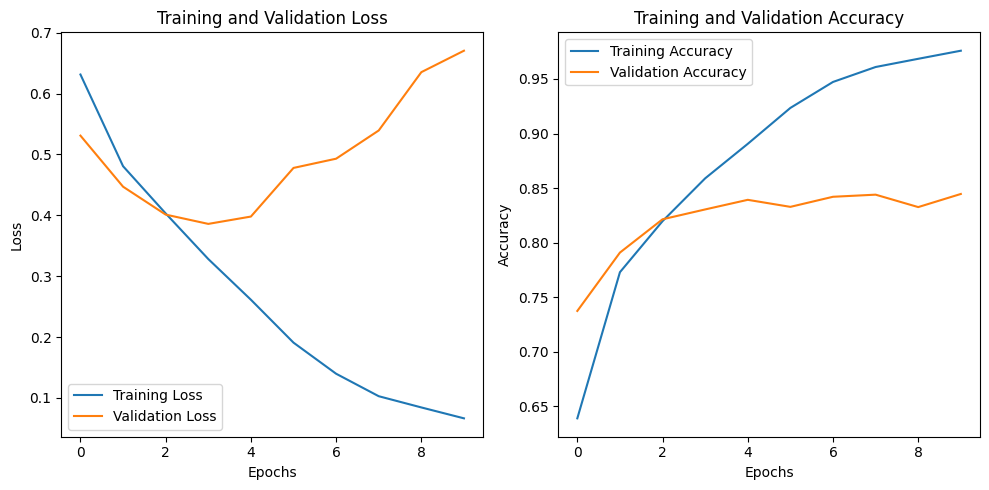

In [21]:
import matplotlib.pyplot as plt

# Get the training history
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
